# A notebook of lq-CMA-ES related stuff

**Links**

- [Paper reference](https://dl.acm.org/authorize?N687611).
  Hansen (2019): A Global Surrogate Assisted CMA-ES. GECCO '19: Proceedings of the Genetic and Evolutionary Computation Conference, pages 664–672 [[pdf]](https://hal.inria.fr/hal-02143961).

- [Performance data (on COCO/bbob) for browsing](http://cma-es.github.io/lq-cma/ppdata-archives)

- <a href="data-archives.zip" download="data-archives.zip">Performance data for downloading (57MB)</a> (not needed when used with [`cocopp`](https://github.com/numbbo/coco) as below)

- [GitHub repository](https://github.com/CMA-ES/lq-cma)


<details>
<summary><b><tt>bibtex</tt></b> entry (click to unfold)</summary>

```
@inproceedings{hansen2019global,
  title={A global surrogate assisted {CMA-ES}},
  author={Hansen, Nikolaus},
  booktitle={Proceedings of the Genetic and Evolutionary Computation Conference ({GECCO})},
  pages={664--672},
  year={2019},
  publisher = {Association for Computing Machinery},
  address = {New York, NY, USA},
  url = {https://doi.org/10.1145/3321707.3321842},
  doi = {10.1145/3321707.3321842}
}
```


## Code to run the algorithm

In [1]:
%pylab widget

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import cma  # to install the module: "pip install cma" or "pip install --upgrade cma"
import cma.fitness_models

fun = cma.fitness_transformations.Function(cma.ff.rosen)  # to count proper evaluations
dimension = 10

es = cma.CMAEvolutionStrategy(dimension * [0.1], 0.1, {'ftarget':1e-11})
surrogate = cma.fitness_models.SurrogatePopulation(fun)
# surrogate = fun  # without surrogate
while not es.stop():
    X = es.ask()  # sample a new population
    F = surrogate(X)  # see Algorithm 1
    es.tell(X, F)  # update sample distribution
    if surrogate != fun:
        es.inject([surrogate.model.xopt])
    es.countevals = fun.evaluations  # record only "true" evaluations
    es.disp()  # just checking what's going on
    es.logger.add()
    es.logger.plot()  # plot in above figure

<details>
<summary>Click to see output</summary>
<small>

```
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=129407, Thu Apr 16 10:31:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      5 1.051825097054228e+01 1.0e+00 9.46e-02  9e-02  1e-01 0:00.0
    2      6 1.511256412052086e+01 1.2e+00 9.63e-02  9e-02  1e-01 0:00.0
    3      7 1.431117668012353e+01 1.2e+00 9.50e-02  9e-02  1e-01 0:00.0
  100    174 7.801168830152305e+00 6.4e+00 1.35e-02  6e-03  2e-02 0:00.4
  200    277 6.689641772270440e+00 7.7e+00 1.96e-02  6e-03  2e-02 0:00.8
  300    381 5.143203232106320e+00 9.2e+00 4.19e-02  8e-03  3e-02 0:01.1
  400    523 3.654699875855813e+00 1.4e+01 7.28e-02  9e-03  3e-02 0:01.6
  500    661 2.013631847120232e+00 1.5e+01 1.73e-01  1e-02  4e-02 0:02.0
  600    781 9.237980850510487e-01 1.8e+01 1.41e-01  5e-03  2e-02 0:02.4
  700    910 1.882447880758025e-01 2.7e+01 7.31e-02  2e-03  1e-02 0:02.8
  800   1020 1.476851240155228e-02 5.1e+01 5.16e-02  7e-04  1e-02 0:03.2
  900   1158 3.569407249208212e-07 7.6e+01 1.24e-03  8e-06  3e-04 0:03.6
  942   1214 4.132932439385136e-12 7.3e+01 3.92e-05  2e-07  7e-06 0:03.8
  ```

A less verbose code example to do the same surrogate-based optimization:

In [2]:
import cma
import cma.fitness_models

fun = cma.ff.rosen
dimension = 10

surrogate = cma.fitness_models.SurrogatePopulation(fun)
x, es = cma.fmin2(None, dimension * [0.1], 0.1, {'ftarget':1e-11},
                  parallel_objective=surrogate)


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1031888, Thu Jun 23 17:29:52 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      5 1.878054899858321e+01 1.0e+00 9.31e-02  9e-02  9e-02 0:00.0
    2      6 1.861345969819252e+01 1.1e+00 9.86e-02  9e-02  1e-01 0:00.0
    3      7 5.082313034062402e+01 1.3e+00 8.75e-02  8e-02  9e-02 0:00.0
  100    160 7.929965421961105e+00 7.6e+00 3.08e-02  1e-02  5e-02 0:00.5
  200    291 5.509869138014378e+00 9.4e+00 2.33e-02  6e-03  2e-02 0:01.2
  300    409 4.307360486208914e+00 2.1e+01 4.15e-02  7e-03  3e-02 0:01.8
  400    521 2.945570642429706e+00 1.7e+01 5.98e-02  6e-03  2e-02 0:02.4
  500    621 1.703093844668369e+00 3.4e+01 8.74e-02  5e-03  3e-02 0:03.0
  600    721 5.332805016293992e-01 2.1e+01 5.54e-02  1e-03  1e-02 0:03.6
  700    846 1.441427710845601e-01 2.7e+01 7.14e-02  1e-03  1e-02 0:04.2
  800    962 1.012512877071283e-02 6.9e+01 6.43e-02  4e-04  2e-02 0:04.8
  900   1091 4.538738548468672e-

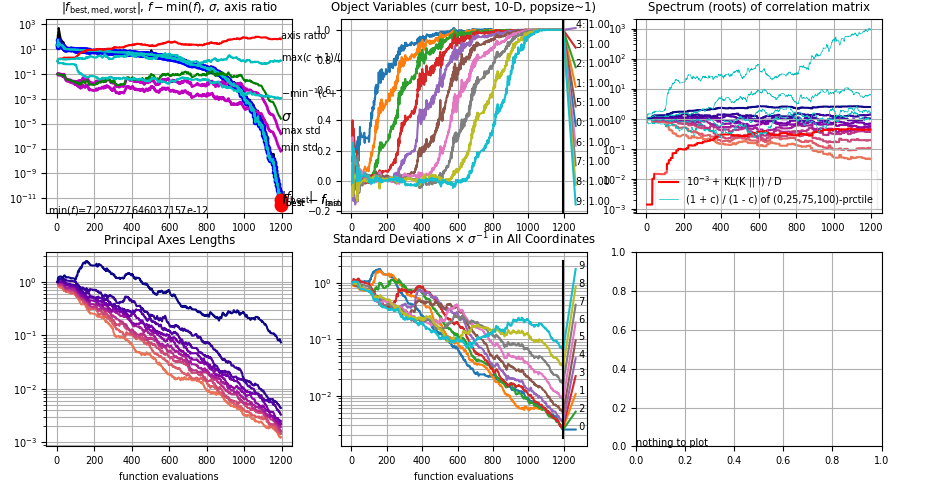

In [3]:
cma.plot();

## Python Script to Run the Benchmarking

[`example_experiment2_lq_cma.py`](http://cma-es.github.io/lq-cma/example_experiment2_lq_cma.py)


## Overview Scaling Data

<details>
    <p>
    <summary>
        click to expand
    </summary>

<A href="http://cma-es.github.io/lq-cma/ppdata-archives/pap-gecco2019/CMA-E_lq-CM/ppfigs.html">
<img width=700 src="scaling-of-lq-cma-vs-cma.png" />
</A>
</details>

## Code to use data in [`cocopp`](https://github.com/numbbo/coco)

In [3]:
import cocopp
qarch = cocopp.archiving.get('http://cma-es.github.io/lq-cma/data-archives/lq-gecco2019')
qarch

['CMA-ES__2019-gecco-surr.tgz',
 'SLSQP+CMA_2019-gecco-surr.tgz',
 'SLSQP-11_2019-gecco-surr.tgz',
 'lq-CMA-ES_2019-gecco-surr.tgz']

In [4]:
cocopp.main(qarch.get_all('') + ['lmm-CMA'])  # add any data from the "official" archive

[Click to browse the result (also with additional data)](http://cma-es.github.io/lq-cma/ppdata-archives/pap-gecco2019/figure5/index.html)

In [5]:
%%html
<iframe width="100%" height="570"
  src="http://cma-es.github.io/lq-cma/ppdata-archives/pap-gecco2019/figure5/index.html"></iframe>